In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

Import and Explore the Dataset

In [30]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [27]:
train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
5,30300,36,0,0,35,19069,8,4,1998,1,0,8181,1826,589,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22723,16361,8,0,1,84,68388,1,2,1993,0,1,3049,198,638,1,10
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [9]:
train.isnull().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [26]:
test

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,37879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
15150,37880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
15151,37881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10
15152,37882,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 15154 non-null  int64
 1   squareMeters       15154 non-null  int64
 2   numberOfRooms      15154 non-null  int64
 3   hasYard            15154 non-null  int64
 4   hasPool            15154 non-null  int64
 5   floors             15154 non-null  int64
 6   cityCode           15154 non-null  int64
 7   cityPartRange      15154 non-null  int64
 8   numPrevOwners      15154 non-null  int64
 9   made               15154 non-null  int64
 10  isNewBuilt         15154 non-null  int64
 11  hasStormProtector  15154 non-null  int64
 12  basement           15154 non-null  int64
 13  attic              15154 non-null  int64
 14  garage             15154 non-null  int64
 15  hasStorageRoom     15154 non-null  int64
 16  hasGuestRoom       15154 non-null  int64
dtypes: int64(17)

In [11]:
test.isnull().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
dtype: int64

In [6]:
submission

,id,price
0,22730,4634456.897
1,22731,4634456.897
2,22732,4634456.897
3,22733,4634456.897
4,22734,4634456.897
...,...,...
15149,37879,4634456.897
15150,37880,4634456.897
15151,37881,4634456.897
15152,37882,4634456.897


In [12]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15154 non-null  int64  
 1   price   15154 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 236.9 KB


In [13]:
submission.isnull().sum()

id       0
price    0
dtype: int64

Analyze Target variable

C:\Users\paula\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


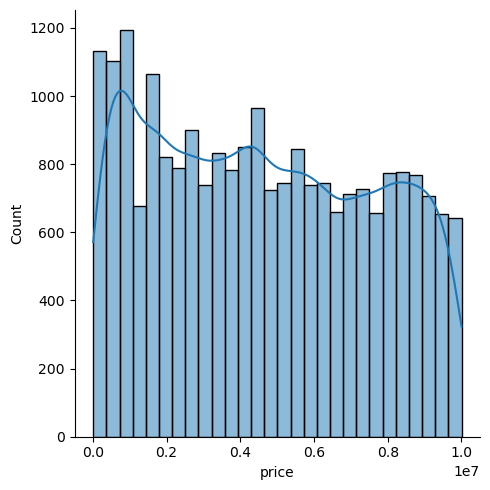

In [14]:
sns.displot(train['price'], kde=True)

In [15]:
train['price'].value_counts()

price
8522151.8    18
107936.9     18
362218.9     16
2506485.7    16
4473490.3    16
             ..
5038241.3     1
4935794.6     1
7531660.1     1
8198185.0     1
8231424.8     1
Name: count, Length: 7421, dtype: int64

In [17]:
train = train[train.groupby('price').price.transform('count') > 1]
train

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
5,5,30300,36,0,0,35,19069,8,4,1998,1,0,8181,1826,589,0,0,3033117.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22723,22723,16361,8,0,1,84,68388,1,2,1993,0,1,3049,198,638,1,10,1647116.3
22725,22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4


C:\Users\paula\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


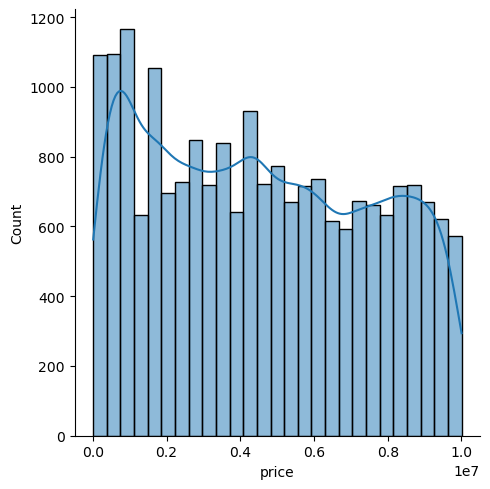

In [18]:
sns.displot(train['price'], kde=True)

<Axes: xlabel='squareMeters', ylabel='price'>

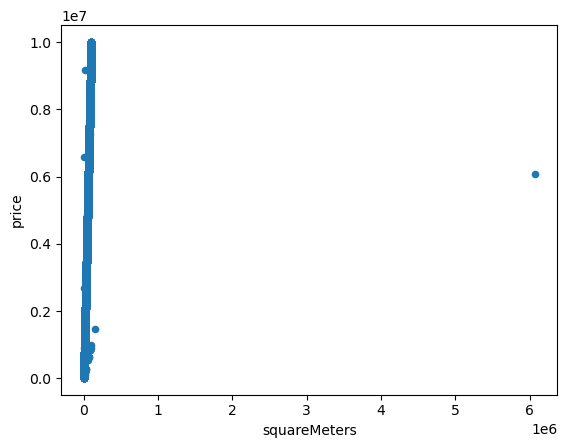

In [19]:
train.plot.scatter(x = 'squareMeters', y = 'price')

<Axes: xlabel='hasYard', ylabel='price'>

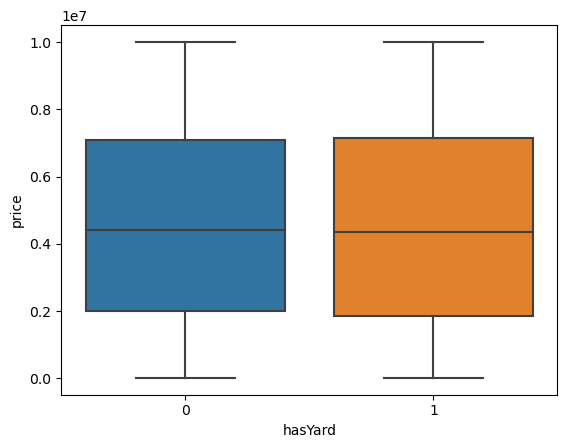

In [21]:
sns.boxplot(x = train['hasYard'],y = train['price'])

Combining Train and Test data

In [31]:
target = train['price']

In [33]:
train_test = train.drop('price', axis = 1)

In [35]:
train_test = pd.concat([train_test, test])

In [37]:
train_test = train_test.drop('id', axis = 1)
train_test

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
15150,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
15151,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10
15152,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2


In [38]:
train_test.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
dtype: int64

<Axes: >

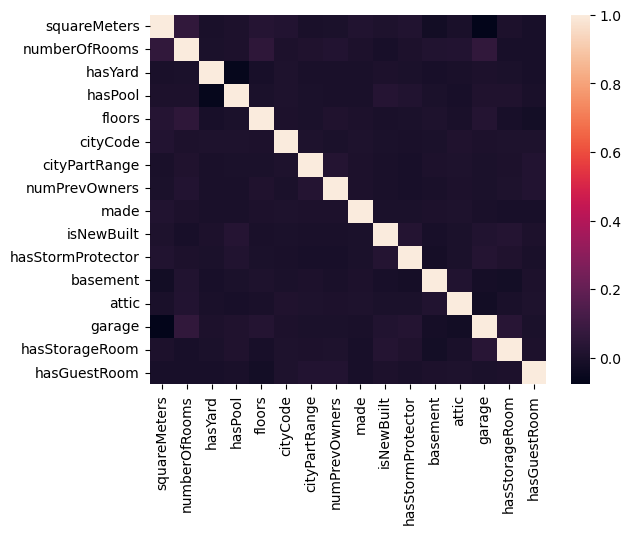

In [40]:
correlation = train_test.corr()
sns.heatmap(correlation)

In [41]:
correlation

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
squareMeters,1.000000,0.064988,-0.003346,0.003154,0.027302,0.022689,-0.003302,-0.000898,0.016264,0.010366,0.017981,-0.023319,-0.005787,-0.078040,0.005917,-0.007163
numberOfRooms,0.064988,1.000000,0.001119,0.004007,0.053855,0.002770,0.012792,0.019588,0.002573,-0.009493,0.005370,0.016250,0.020659,0.064457,-0.010232,-0.010304
hasYard,-0.003346,0.001119,1.000000,-0.064385,-0.009351,0.006564,-0.003386,-0.003322,-0.006405,0.002037,0.000064,-0.008281,-0.004937,0.002617,0.000352,-0.006507
hasPool,0.003154,0.004007,-0.064385,1.000000,0.001555,0.007981,0.000689,-0.005465,-0.006166,0.028899,0.016716,-0.002032,-0.008384,0.012822,0.011574,-0.002287
floors,0.027302,0.053855,-0.009351,0.001555,1.000000,0.002061,-0.000026,0.011482,0.003211,-0.003878,0.000400,0.007108,-0.004423,0.023755,-0.006954,-0.019624
cityCode,0.022689,0.002770,0.006564,0.007981,0.002061,1.000000,0.008122,-0.001643,0.007114,0.001413,-0.002986,-0.002058,0.011891,0.006093,0.007464,0.006720
cityPartRange,-0.003302,0.012792,-0.003386,0.000689,-0.000026,0.008122,1.000000,0.024538,0.004449,-0.003919,-0.006717,0.003630,0.009282,0.001454,0.005261,0.020914
numPrevOwners,-0.000898,0.019588,-0.003322,-0.005465,0.011482,-0.001643,0.024538,1.000000,0.002052,-0.002447,-0.009185,-0.005681,0.003247,-0.001730,0.008564,0.019677
made,0.016264,0.002573,-0.006405,-0.006166,0.003211,0.007114,0.004449,0.002052,1.000000,-0.001117,-0.001584,0.004335,0.009602,-0.004506,-0.006662,-0.007444
isNewBuilt,0.010366,-0.009493,0.002037,0.028899,-0.003878,0.001413,-0.003919,-0.002447,-0.001117,1.000000,0.027228,-0.010136,-0.000699,0.015807,0.024363,0.005691


In [47]:
#Normalization
scaler = MinMaxScaler()
train_test_norm = scaler.fit_transform(train_test)
train_test_norm = pd.DataFrame(train_rev, columns=train_test.columns)
train_test_norm

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0.005637,0.232323,1.0,0.0,0.007668,0.036495,0.111111,0.000000,0.001248,0.0,1.0,0.000043,0.053901,0.040497,0.0,0.3
1,0.015660,0.595960,0.0,1.0,0.009835,0.035554,0.000000,0.333333,0.001248,0.0,1.0,0.007881,0.046638,0.030290,0.0,0.6
2,0.015251,0.444444,1.0,1.0,0.010168,0.046479,0.333333,0.777778,0.003745,1.0,1.0,0.081195,0.092882,0.026739,1.0,0.9
3,0.015996,0.989899,0.0,0.0,0.009668,0.015451,0.000000,0.000000,0.001248,0.0,1.0,0.069792,0.088410,0.027960,1.0,0.9
4,0.010160,1.000000,0.0,0.0,0.009335,0.065691,0.777778,0.333333,0.003496,1.0,0.0,0.077695,0.028896,0.095307,0.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37879,0.014184,0.737374,1.0,1.0,0.012002,0.014322,0.111111,1.000000,0.000375,1.0,0.0,0.040331,0.040392,0.073339,1.0,0.1
37880,0.007546,0.404040,1.0,1.0,0.010502,0.086104,0.333333,0.444444,0.002247,0.0,0.0,0.008468,0.079135,0.107844,0.0,0.0
37881,0.012104,0.505051,0.0,0.0,0.006668,0.050371,1.000000,0.444444,0.001748,0.0,1.0,0.089175,0.018427,0.085543,0.0,1.0
37882,0.012771,0.505051,0.0,1.0,0.005334,0.068565,0.333333,0.222222,0.003620,0.0,0.0,0.104079,0.100695,0.014535,0.0,0.2


In [51]:
y = target
X = train_test_norm[: len(train)]
X_test = train_test_norm[len(train) :]
X['target'] = target

C:\Users\paula\AppData\Local\Temp\ipykernel_14276\583444752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['target'] = target


In [55]:
train = X.sample(frac=.9, random_state=42)
test = X.drop(train.index)

X_train = train.iloc[:, :-1]
y_train = train.iloc[:,-1]

X_val = test.iloc[:, :-1]
y_val = test.iloc[:,-1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((20457, 16), (20457,), (2273, 16), (2273,), (2273, 16))

Selecting and Building the Model

In [60]:
model = XGBRegressor()
xgb_model = model.fit(X_train, y_train)
print(xgb_model.score(X_train, y_train))

0.9999051736596325


In [59]:
y_predict = xgb_model.predict(X_val)
y_predict = y_predict.astype(int)
print(xgb_model.score(X_val, y_val))

0.9990513050241976
